#### Leer el archivo

In [2]:
import pandas as pd

file = pd.read_excel("../database/database_2018_2021.xlsx")
file.head()

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
0,2018-0002-CHE,No,nat-met-sto-sev,Natural,Meteorological,Storm,Severe weather,NaN,Eleanor,CHE,...,NaN,NaN,16300.0,19779.0,NaN,NaN,82.410668,"[{""adm1_code"":2812,""adm1_name"":""Bern""},{""adm1_...",2018-01-04,2023-09-25
1,2018-0002-ESP,No,nat-met-sto-sev,Natural,Meteorological,Storm,Severe weather,NaN,Eleanor,ESP,...,NaN,NaN,NaN,NaN,NaN,NaN,82.410668,"[{""adm2_code"":25825,""adm2_name"":""Gipuzkoa""}]",2018-01-04,2023-09-25
2,2018-0002-FRA,No,nat-met-sto-sev,Natural,Meteorological,Storm,Severe weather,NaN,Eleanor,FRA,...,NaN,NaN,NaN,NaN,200000.0,242687.0,82.410668,"[{""adm1_code"":1253,""adm1_name"":""Bretagne""},{""a...",2018-01-04,2023-09-25
3,2018-0002-GBR,No,nat-met-sto-sev,Natural,Meteorological,Storm,Severe weather,NaN,Eleanor,GBR,...,NaN,NaN,NaN,NaN,NaN,NaN,82.410668,"[{""adm1_code"":3182,""adm1_name"":""England""},{""ad...",2018-01-05,2023-09-25
4,2018-0002-IRL,No,nat-met-sto-sev,Natural,Meteorological,Storm,Severe weather,NaN,Eleanor,IRL,...,NaN,NaN,NaN,NaN,NaN,NaN,82.410668,"[{""adm1_code"":1584,""adm1_name"":""Clare""},{""adm1...",2018-01-04,2023-09-25


### Filtros

In [11]:
df_hydrological = file[file["Disaster Subgroup"] == "Hydrological"] # filtro por tipo de desastre Hydrological
df_hydrological.info()

<class 'pandas.core.frame.DataFrame'>
Index: 813 entries, 6 to 1598
Data columns (total 46 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   DisNo.                                     813 non-null    object 
 1   Historic                                   813 non-null    object 
 2   Classification Key                         813 non-null    object 
 3   Disaster Group                             813 non-null    object 
 4   Disaster Subgroup                          813 non-null    object 
 5   Disaster Type                              813 non-null    object 
 6   Disaster Subtype                           813 non-null    object 
 7   External IDs                               210 non-null    object 
 8   Event Name                                 2 non-null      object 
 9   ISO                                        813 non-null    object 
 10  Country                       

In [17]:
df_hydrological_magnitude = df_hydrological[df_hydrological["Magnitude"] > 0]
df_hydrological_magnitude.info()

<class 'pandas.core.frame.DataFrame'>
Index: 109 entries, 6 to 1423
Data columns (total 46 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   DisNo.                                     109 non-null    object 
 1   Historic                                   109 non-null    object 
 2   Classification Key                         109 non-null    object 
 3   Disaster Group                             109 non-null    object 
 4   Disaster Subgroup                          109 non-null    object 
 5   Disaster Type                              109 non-null    object 
 6   Disaster Subtype                           109 non-null    object 
 7   External IDs                               95 non-null     object 
 8   Event Name                                 0 non-null      object 
 9   ISO                                        109 non-null    object 
 10  Country                       

In [33]:
df_hydrological_magnitude.isnull().sum()

DisNo.                                         0
Historic                                       0
Classification Key                             0
Disaster Group                                 0
Disaster Subgroup                              0
Disaster Type                                  0
Disaster Subtype                               0
External IDs                                  14
Event Name                                   109
ISO                                            0
Country                                        0
Subregion                                      0
Region                                         0
Location                                       2
Origin                                        19
Associated Types                              69
OFDA/BHA Response                              0
Appeal                                         0
Declaration                                    0
AID Contribution ('000 US$)                  109
Magnitude           

In [83]:
muertos = df_hydrological_magnitude["Total Deaths"]
muertos = pd.DataFrame(muertos[muertos > 0])
muertos.describe()

,Total Deaths
count,80.000000
mean,33.850000
std,59.670424
min,1.000000
25%,4.000000
50%,10.000000
75%,30.250000
max,285.000000


In [114]:
magnitud = df_hydrological_magnitude['Magnitude']
magnitud_Scale = df_hydrological_magnitude['Magnitude Scale']

magnitud = pd.Series(magnitud)
magnitud_Scale = pd.Series(magnitud_Scale)
mg = pd.DataFrame({"Magnitud":magnitud, "Escala":magnitud_Scale})
mg.head()

,Magnitud,Escala
6,5597.13,Km2
22,72015.73,Km2
23,234622.64,Km2
25,55138.95,Km2
48,245647.66,Km2


In [112]:
mg.describe()

,Magnitud
count,109.000000
mean,126065.428440
std,145002.832574
min,2882.250000
25%,24680.900000
50%,77631.980000
75%,172029.580000
max,632315.720000


### Graficas

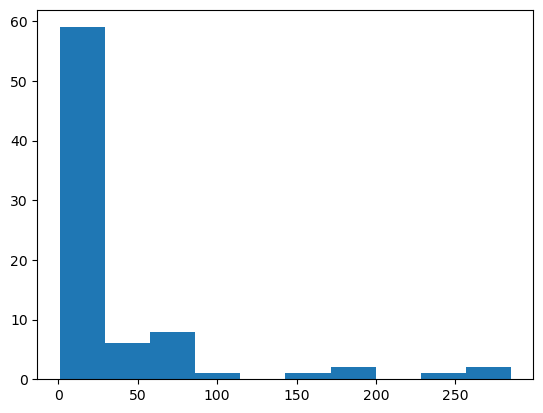

In [119]:
import matplotlib.pyplot as plt

plt.hist(muertos)
plt.show()

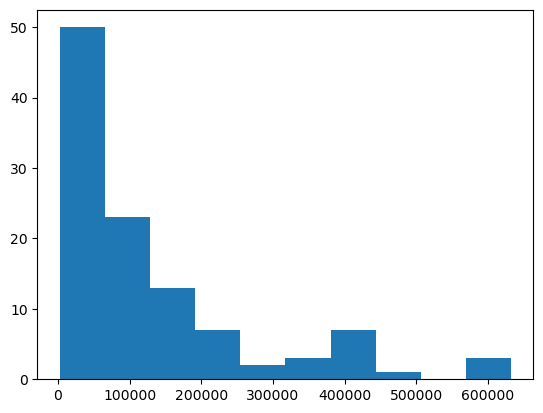

In [127]:
plt.hist(mg['Magnitud'])
plt.show()

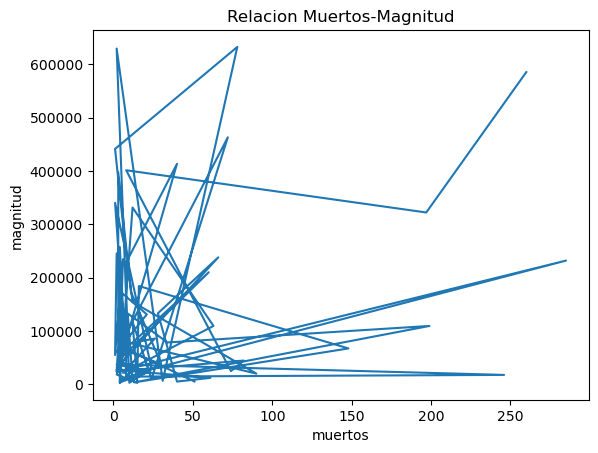

In [141]:
plt.plot(muertos, mg['Magnitud'][:80]) # No se xd
plt.title('Relacion Muertos-Magnitud')
plt.xlabel('muertos')
plt.ylabel('magnitud')
plt.show()

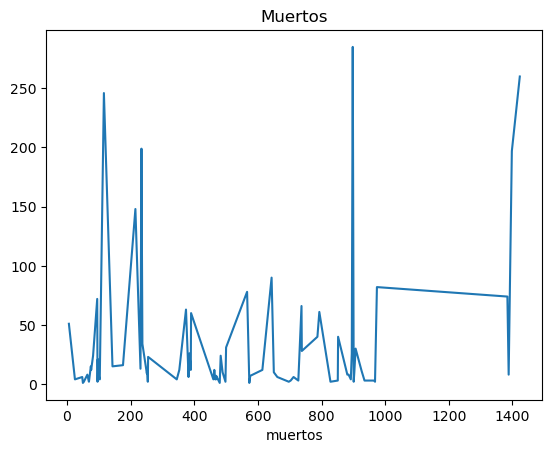

In [147]:
plt.plot(muertos)
plt.title('Muertos')
plt.xlabel('muertos')
plt.show()